In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
path = "https://raw.githubusercontent.com/devvratmiglani/SA_Mini_Project_5th_SEM/main/Mental-Health-Twitter-Cleaned.csv"
df = pd.read_csv(path)

**Data Preprocessing**

In [ ]:
df.head()

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,SewHQ: Retro bears make perfect gifts and are ...,1
4,It’s hard to say whether packing lists are mak...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_text  20000 non-null  object
 1   label      20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [ ]:
df

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,SewHQ: Retro bears make perfect gifts and are ...,1
4,It’s hard to say whether packing lists are mak...,1
...,...,...
19995,A day without sunshine is like night.,0
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",0
19997,The flow chart is a most thoroughly oversold p...,0
19998,"Ships are safe in harbor, but they were never ...",0


In [ ]:
# checking missing values
df.isnull().sum()

post_text    0
label        0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
# rechecking missing values
df.isnull().sum()

post_text    0
label        0
dtype: int64

In [ ]:
# checking for duplicate values
df[df.duplicated()]

,post_text,label
142,richardbranson: Read this wonderful blog about...,1
393,College minor in substance abuse? addiction,1
538,What would your life be like with less anxiety?,1
665,Older women still enjoy sex too:,1
679,Therapy is an effective treatment of depressio...,1
...,...,...
19636,User:MissionTrailCameras19,0
19637,User:Nitrobuild03,0
19639,Boob Job UK,0
19788,"""That must be wonderful! I don't understand it...",0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,SewHQ: Retro bears make perfect gifts and are ...,1
4,It’s hard to say whether packing lists are mak...,1
...,...,...
19995,A day without sunshine is like night.,0
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",0
19997,The flow chart is a most thoroughly oversold p...,0
19998,"Ships are safe in harbor, but they were never ...",0


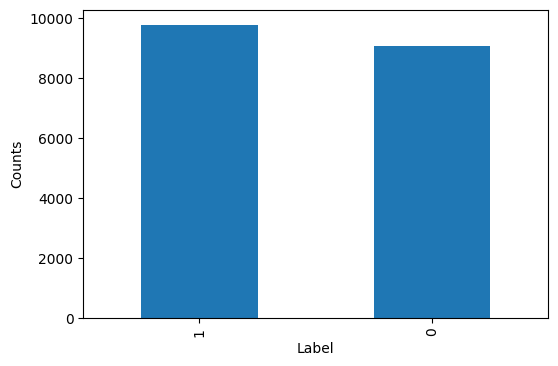

In [ ]:

category_counts = df['label'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.show()
print()

plt.show()

In [ ]:
# it is a method by which we can turn the words into their base form ie simpler form which eventually helps us to perform and train our model well

import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def text_lemmatize(text):
    word_list = nltk.word_tokenize(text) # tokenize the sentence

    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])  # Lemmatize list of words and join

    return lemmatized_output

In [ ]:
df['post_text'] = df['post_text'].apply(text_lemmatize)

In [ ]:
df.head(5)

,post_text,label
0,It 's just over 2 year since I wa diagnosed wi...,1
1,"It 's Sunday , I need a break , so I 'm planni...",1
2,Awake but tired . I need to sleep but my brain...,1
3,SewHQ : Retro bear make perfect gift and are g...,1
4,It ’ s hard to say whether packing list are ma...,1


In [ ]:
# removal of stop words

def remove_stopwords(sentence):
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
                 "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out",
                 "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was",
                 "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

In [ ]:
df['post_text'] = df['post_text'].apply(remove_stopwords)

In [ ]:
df['label_name'] = df.label.map({
    0: 'No stress',
    1: 'Stress'
})

In [ ]:
df.head(-5)

,post_text,label,label_name
0,'s just 2 year since wa diagnosed anxiety depr...,1,Stress
1,"'s sunday , need break , 'm planning spend lit...",1,Stress
2,awake tired . need sleep brain ha idea ...,1,Stress
3,sewhq : retro bear make perfect gift great beg...,1,Stress
4,’ s hard say whether packing list making life ...,1,Stress
...,...,...,...
19990,egotism anesthetic given kindly nature relieve...,0,No stress
19991,economics extremely useful form employment eco...,0,No stress
19992,"winning pennant one year , casey stengel comme...",0,No stress
19993,every hath wherefore . -- william shakespeare ...,0,No stress


In [ ]:
# splitting the data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.post_text,
    df.label,
    test_size=0.2, # 20% samples will go to test dataset ie 80-20
    random_state=42,
    stratify=df.label
)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (15099,)
Shape of X_test:  (3775,)


In [ ]:
X_train.head()

18008                          now2016 nowzayn vote zayn b
5138     god friend saw last tweet know wa talking guys...
6561     love talking bestie ! ! 's best ! & lt ; 3 muc...
5668     chuckwendig : amazon prime day lightning deals...
5321     will not kiss youuuuu hardest part leaving you...
Name: post_text, dtype: object

In [ ]:
# we will be using tf-idf for text vectorization which is simply converting the text into mumeric vectors

#1. Multinomial Naive Bayes Classifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
classification_reports = {}

In [ ]:
mnb_model = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('MultinomialNB', MultinomialNB())
])

mnb_model.fit(X_train, y_train)

y_pred = mnb_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Multinomial Naive Bayes Classifier'] = CR
print(CR)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1817
           1       0.82      0.94      0.88      1958

    accuracy                           0.86      3775
   macro avg       0.87      0.86      0.86      3775
weighted avg       0.87      0.86      0.86      3775



In [ ]:
# Multinomial Naive Bayes has the accuracy of 85%

In [ ]:
X_test[:5]

2953     calum5sos : met dude tonight wa fan . wa full ...
10478                   adclaidekanes world deserves world
18480                                    user : chenault57
11939         realdonaldtrump supporter not deplorable , .
15069                  puteih : guy already 2 . azfarovski
Name: post_text, dtype: object

In [ ]:
y_test[:5]

2953     1
10478    0
18480    0
11939    0
15069    0
Name: label, dtype: int64

In [ ]:
y_pred[:5]

array([1, 0, 0, 0, 0])

In [ ]:
#2. Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Random Forest', RandomForestClassifier())
])

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Random Forest Classifier'] = CR
print(CR)

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1817
           1       0.76      0.88      0.82      1958

    accuracy                           0.80      3775
   macro avg       0.80      0.79      0.79      3775
weighted avg       0.80      0.80      0.79      3775



In [ ]:
# Random Forest Classifier has the accuracy of 80%

In [ ]:
#3. Support Vector Machine

from sklearn.svm import SVC

svm_model = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('SVM', SVC(probability=True))
])

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Support Vector Machine'] = CR
print(CR)

              precision    recall  f1-score   support

           0       0.89      0.80      0.85      1817
           1       0.83      0.91      0.87      1958

    accuracy                           0.86      3775
   macro avg       0.86      0.86      0.86      3775
weighted avg       0.86      0.86      0.86      3775



In [ ]:
# Support Vector Machine has the accuracy of 85%

In [ ]:
# 4. Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_model = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Decision Tree', DecisionTreeClassifier())
])

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Decision Tree Classifier'] = CR
print(CR)

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1817
           1       0.75      0.82      0.78      1958

    accuracy                           0.76      3775
   macro avg       0.77      0.76      0.76      3775
weighted avg       0.77      0.76      0.76      3775



In [ ]:
# Decision Tree has the accuracy of 76%

In [ ]:
# Final Ensemble Classifier
# We'll be using the ensemble voting classifier and the soft voting method. As the accuracy of Random Forest classifier and SVM is seen to be better than Decision Tree and Multinomial
## Naive Bayes, we'll be using them as the base classifiers in the ensemble classifiers

from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(
    estimators=[
        ('SVM', svm_model),
        ('Multinomial Naive Bayes', mnb_model)
    ],
    voting='soft'  # Use soft voting for probability-based weighting
)

voting_classifier.fit(X_train, y_train)
y_pred = voting_classifier.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Final Ensemble Classifier'] = CR
print(CR)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1817
           1       0.84      0.91      0.88      1958

    accuracy                           0.87      3775
   macro avg       0.87      0.87      0.87      3775
weighted avg       0.87      0.87      0.87      3775



In [ ]:
#Final Ensemble accuracy is 86%

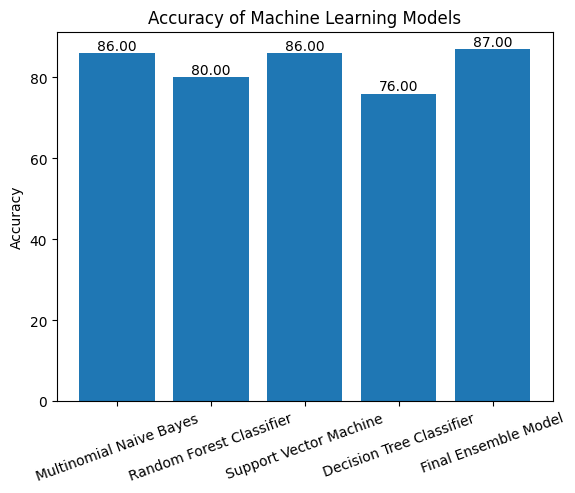

In [ ]:

models = ['Multinomial Naive Bayes', 'Random Forest Classifier', 'Support Vector Machine', 'Decision Tree Classifier','Final Ensemble Model']
accuracy_values = [86, 80, 86, 76, 87]
bars = plt.bar(models, accuracy_values)

plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')
plt.xticks(rotation=20)

for bar, value in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}',
             ha='center', va='bottom')

plt.show()


In [ ]:
for key, value in classification_reports.items():
    print(f'-------------------------{key}-------------------------')
    print(f'{value}\n')


-------------------------Multinomial Naive Bayes Classifier-------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1817
           1       0.82      0.94      0.88      1958

    accuracy                           0.86      3775
   macro avg       0.87      0.86      0.86      3775
weighted avg       0.87      0.86      0.86      3775


-------------------------Random Forest Classifier-------------------------
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1817
           1       0.76      0.88      0.82      1958

    accuracy                           0.80      3775
   macro avg       0.80      0.79      0.79      3775
weighted avg       0.80      0.80      0.79      3775


-------------------------Support Vector Machine-------------------------
              precision    recall  f1-score   support

           0       0.89      0.80      0.85      1817
  